<a href="https://colab.research.google.com/github/vovaekb/ml_playground/blob/master/src/imagenet_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using pre-trained models: VGG16**

Tutorial: https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

In [0]:
!pip install pillow

In [0]:
!wget https://static.toiimg.com/thumb/63168213/Indian-Railways-to-cut-luxury-trains-tariff-by-50.jpg?width=748&height=499 && mv Indian-Railways-to-cut-luxury-trains-tariff-by-50.jpg?width=748 train.jpg

--2019-04-11 11:10:32--  https://static.toiimg.com/thumb/63168213/Indian-Railways-to-cut-luxury-trains-tariff-by-50.jpg?width=748
Resolving static.toiimg.com (static.toiimg.com)... 23.5.141.71, 2001:590:2809:285::216f, 2001:590:2809:291::216f
Connecting to static.toiimg.com (static.toiimg.com)|23.5.141.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12691 (12K) [image/jpeg]
Saving to: ‘Indian-Railways-to-cut-luxury-trains-tariff-by-50.jpg?width=748’

Indian-Railways-to- 100%[===================>]  12.39K  --.-KB/s    in 0s      

2019-04-11 11:10:33 (118 MB/s) - ‘Indian-Railways-to-cut-luxury-trains-tariff-by-50.jpg?width=748’ saved [12691/12691]



In [0]:
!ls -l train.jpg

-rw-r--r-- 1 root root 12691 Apr 11 11:09 train.jpg


In [0]:
import keras
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16
import numpy as np
import cv2

# load the original image via OpenCV
orig = cv2.imread('train.jpg')


Using TensorFlow backend.


In [0]:
print("[INFO] loading and preprocessing image...")
image = image_utils.load_img('train.jpg', target_size=(224, 224))
image = image_utils.img_to_array(image)

[INFO] loading and preprocessing image...


In [0]:
image.shape

(224, 224, 3)

In [0]:
# our image is now represented by a NumPy array of shape (224, 224, 3),
# assuming TensorFlow "channels last" ordering of course, but we need
# to expand the dimensions to be (1, 3, 224, 224) so we can pass it
# through the network -- we'll also preprocess the image by subtracting
# the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
print(image.shape)
image = preprocess_input(image)

(1, 224, 224, 3)


In [0]:
# load the VGG16 network pre-trained on the ImageNet dataset
print("[INFO] loading network...")
model = VGG16(weights="imagenet")

# classify the image
preds = model.predict(image)
P = decode_predictions(preds)
print(P[0])

[INFO] loading network...
Instructions for updating:
Colocations handled automatically by placer.
40960/35363 [==================================] - 0s 0us/step
[('n03393912', 'freight_car', 0.14681947), ('n04366367', 'suspension_bridge', 0.12463818), ('n03895866', 'passenger_car', 0.12135008), ('n04335435', 'streetcar', 0.09312374), ('n02793495', 'barn', 0.07235849)]


In [0]:
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
  print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. freight_car: 14.68%
2. suspension_bridge: 12.46%
3. passenger_car: 12.14%
4. streetcar: 9.31%
5. barn: 7.24%


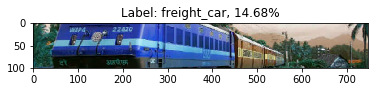

In [0]:
from matplotlib import pyplot as plt

%matplotlib inline

# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread('train.jpg')
(imagenetID, label, prob) = P[0][0]
plt.title("Label: {}, {:.2f}%".format(label, prob * 100)) # "Classification"
plt.imshow(orig)
plt.show()